# *Importing Necessary Libraries and Tools for the Project*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# *Exploratory Data Analysis (EDA)*

In [2]:
data = pd.read_csv("F:\PROJECTS\codeclause\loan prediction\dataset\Training data.csv")
data = data.drop("Id", axis = 1)
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


Text(0.5, 1.0, 'Age Count')

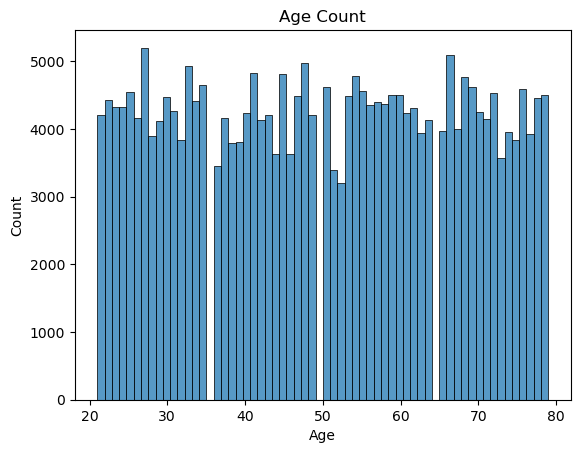

In [3]:
#Distribution of Age of the people
sns.histplot(data.Age)
plt.xlabel("Age")
plt.title("Age Count")

**From the above Bar Plot we can clearly deduce that we've a overall equally balanced Age distribution in our dataset**

In [4]:
data.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

Text(0, 0.5, 'Frequency')

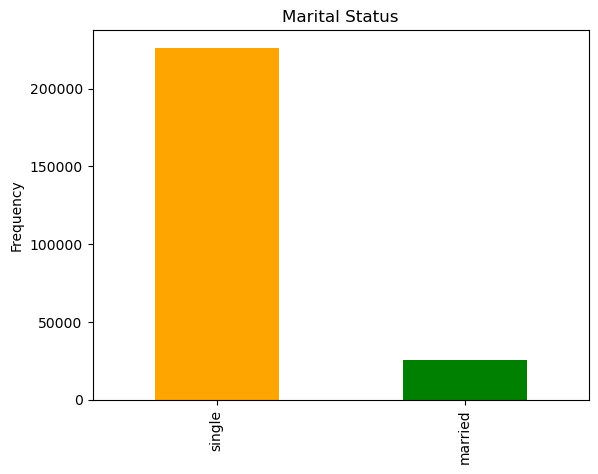

In [5]:
#Distribution of Marital Status
MaritalStatus = data['Married/Single'].value_counts()
MaritalStatus.plot.bar(color=['orange', 'green'])
plt.title("Marital Status")
plt.ylabel("Frequency")

**This shows that we have maximum of single Individuals than Married couples in our dataset**

plot = sns.FacetGrid(data, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(data, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')

plt.title("Property Ownership")

Text(0, 0.5, 'Frequency')

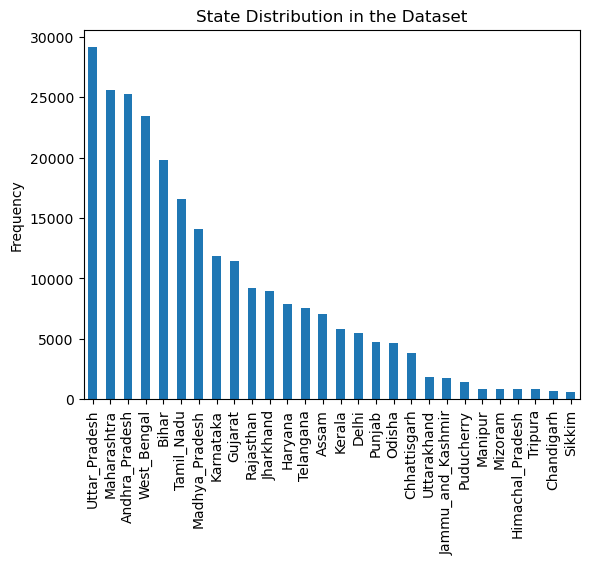

In [6]:
#Distribution of people from various states
StateDistribution = data.STATE.value_counts()
StateDistribution.plot.bar()
plt.xticks(rotation=90)
plt.title("State Distribution in the Dataset")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Property Ownership')

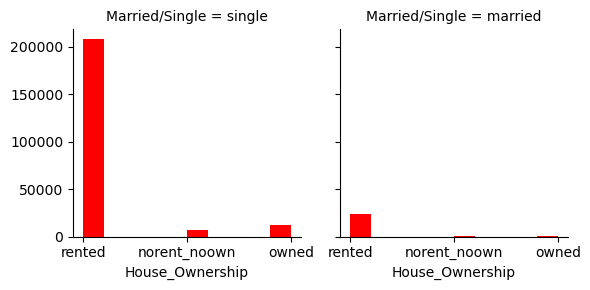

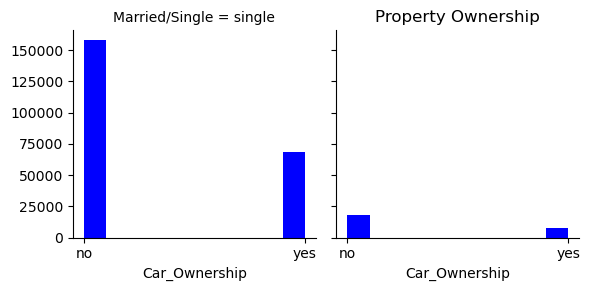

In [7]:
# Property Ownership w.r.t Marital Status

plot = sns.FacetGrid(data, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(data, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')

plt.title("Property Ownership")

# *Data Cleaning*

In [8]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [9]:
totalMissingVals = data.isnull().sum().sort_values(ascending=True)
totalMissingVals

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**We can see that we don't have any missing values.**

In [10]:
data.index.is_unique

True

**Dataset is free from any duplicate values.**

**Handling Outliers**

<Axes: >

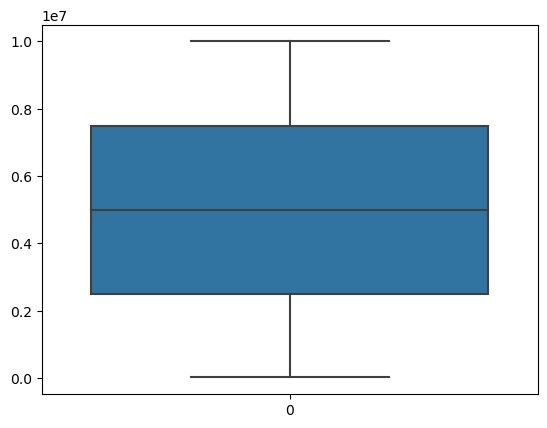

In [11]:
sns.boxplot(data.Income)

# *Data Preprocessing*

In [12]:
data_en = data.copy()

# Let's drop the unnecessary Features
data_en = data_en.drop('CITY',axis=1)
data_en = data_en.drop('STATE',axis=1)

In [13]:
# Using Label Encoder to encode our Categorical Data
encoder = LabelEncoder()

categorical = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

for feature in categorical:
    data_en[feature] = encoder.fit_transform(data_en[feature])

data_en.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


In [14]:
# Let's see what Encoding Label Encoder has done to our Profession Feature
unique_features = data['Profession'].unique()
encoded_features = data_en['Profession'].unique()
for feature, encoded_feature in zip(unique_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'Mechanical_engineer' : 33
'Software_Developer' : 43
'Technical_writer' : 47
'Civil_servant' : 11
'Librarian' : 31
'Economist' : 20
'Flight_attendant' : 25
'Architect' : 2
'Designer' : 18
'Physician' : 37
'Financial_Analyst' : 23
'Air_traffic_controller' : 0
'Politician' : 39
'Police_officer' : 38
'Artist' : 4
'Surveyor' : 46
'Design_Engineer' : 17
'Chemical_engineer' : 9
'Hotel_Manager' : 28
'Dentist' : 16
'Comedian' : 12
'Biomedical_Engineer' : 6
'Graphic_Designer' : 27
'Computer_hardware_engineer' : 13
'Petroleum_Engineer' : 36
'Secretary' : 42
'Computer_operator' : 14
'Chartered_Accountant' : 7
'Technician' : 48
'Microbiologist' : 34
'Fashion_Designer' : 22
'Aviator' : 5
'Psychologist' : 40
'Magistrate' : 32
'Lawyer' : 30
'Firefighter' : 24
'Engineer' : 21
'Official' : 35
'Analyst' : 1
'Geologist' : 26
'Drafter' : 19
'Statistician' : 44
'Web_designer' : 50
'Consultant' : 15
'Chef' : 8
'Army_officer' : 3
'Surgeon' : 45
'Scientist' : 41
'Civil_engineer' : 10
'Industrial_Engineer' : 2

In [15]:
# Similarly Let's check for House Ownershi
unique_features = data['House_Ownership'].unique()
encoded_features = data_en['House_Ownership'].unique()
for feature, encoded_feature in zip(unique_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'rented' : 2
'norent_noown' : 0
'owned' : 1


In [16]:
data_en.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

**Feature Selection**

Now we will construct a heatmap(), using the seaborn library with a newly formed data frame,

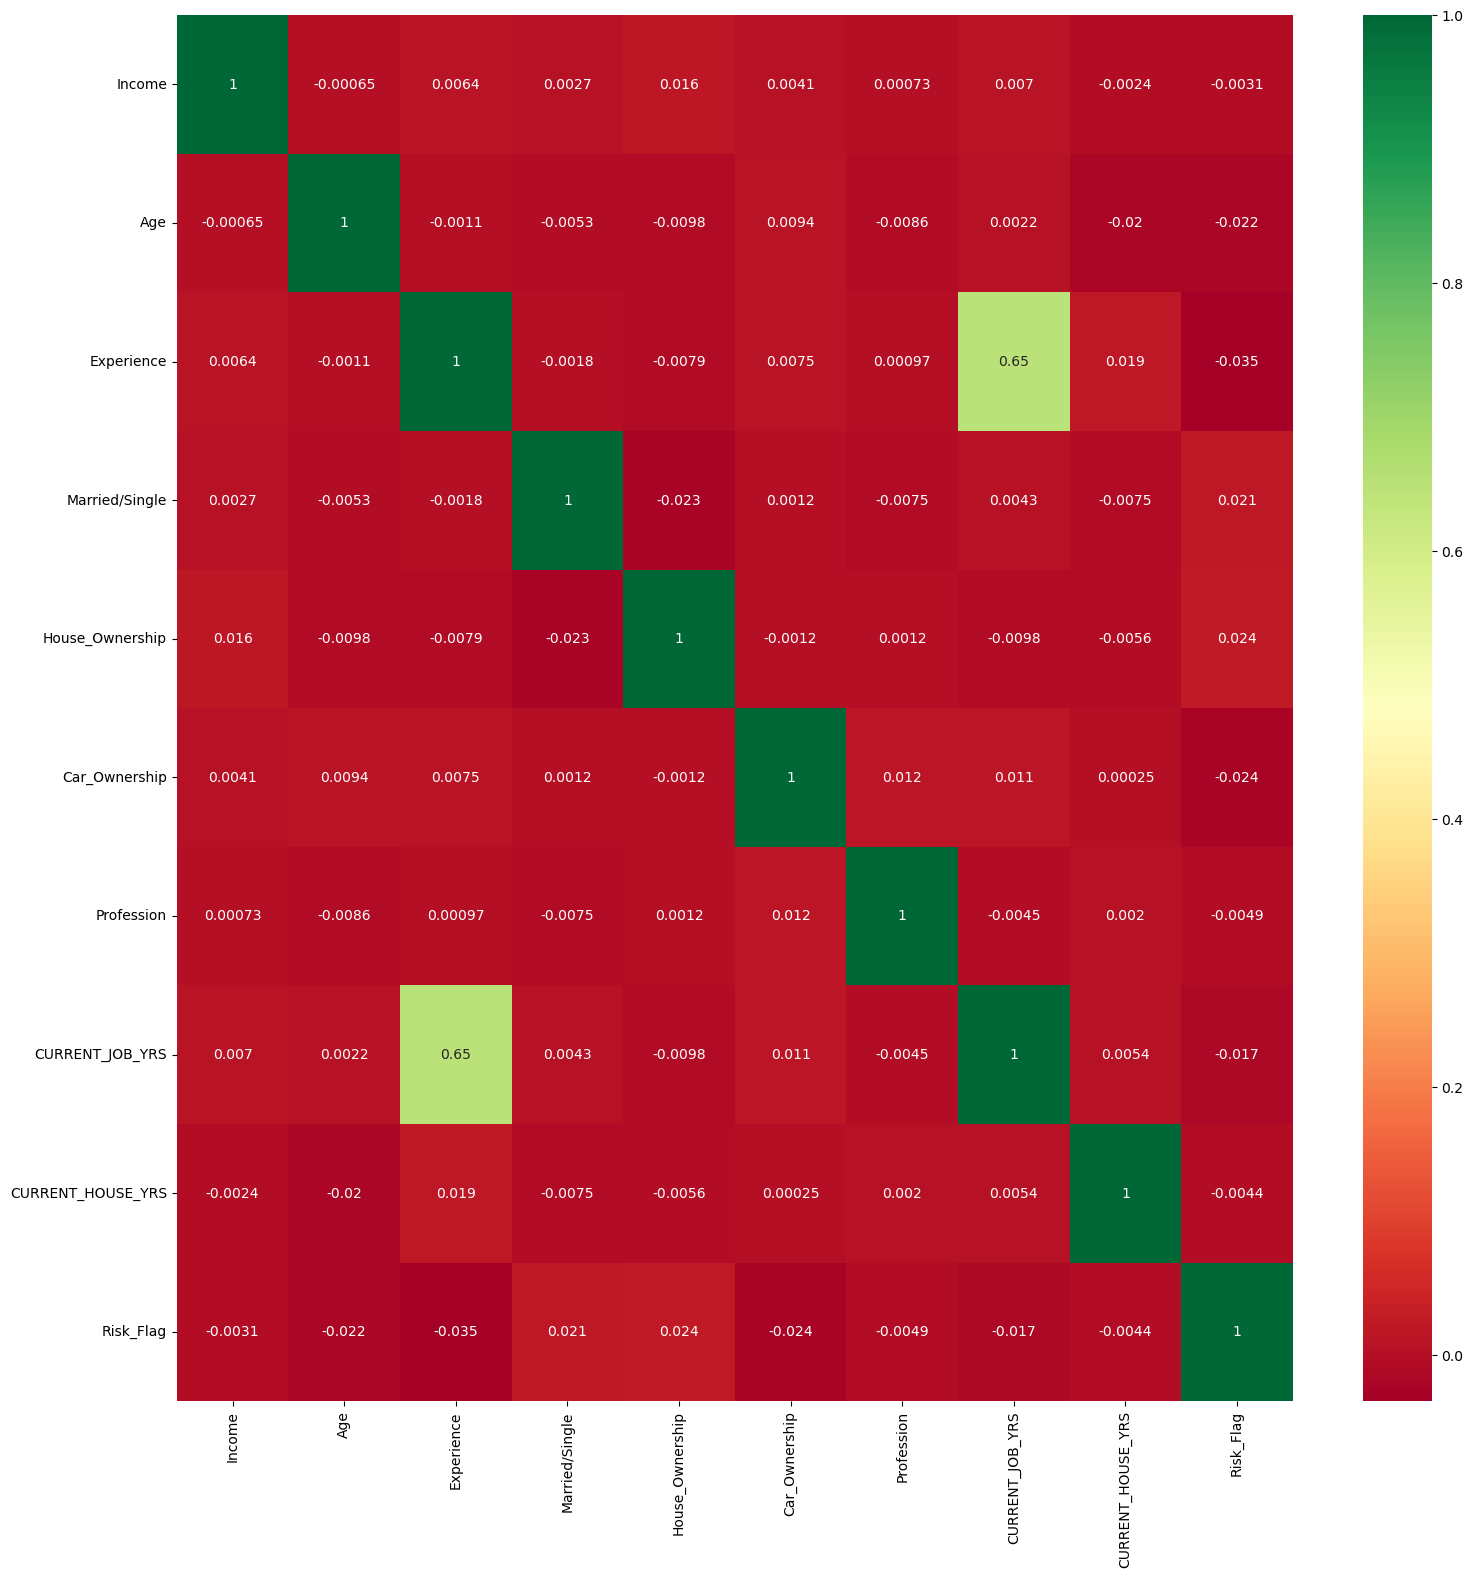

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(data_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [18]:
features = data_en.corr()['Risk_Flag'].sort_values()
features

Experience          -0.034523
Car_Ownership       -0.024036
Age                 -0.021809
CURRENT_JOB_YRS     -0.016942
Profession          -0.004900
CURRENT_HOUSE_YRS   -0.004375
Income              -0.003091
Married/Single       0.021092
House_Ownership      0.023622
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

In [19]:
data_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,14.000000,14.000000,1.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in [data_en.columns]:
    data_en[i] = scaler.fit_transform(data_en[i])

data_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.505535,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.195940,0.458948,0.294571,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.260000,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.520000,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.760000,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# *Modeling*

In [21]:
# Setting up Training & Testing DFs
X = data_en.drop(columns='Risk_Flag')
y = data_en['Risk_Flag']

In [22]:
#Defining a Function to Test and See Scores of our Different Models
def useModel(model, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plotting confusion matrix
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::-1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     66329
         1.0       0.54      0.51      0.52      9271

    accuracy                           0.89     75600
   macro avg       0.73      0.73      0.73     75600
weighted avg       0.88      0.89      0.88     75600



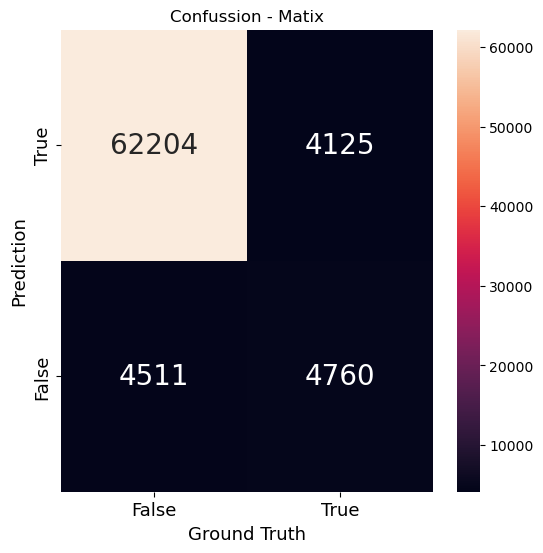

In [23]:
# Using K-Nearest-Neighborhood

from sklearn.neighbors import KNeighborsClassifier

useModel(KNeighborsClassifier(n_neighbors=3), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     66329
         1.0       0.51      0.58      0.54      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



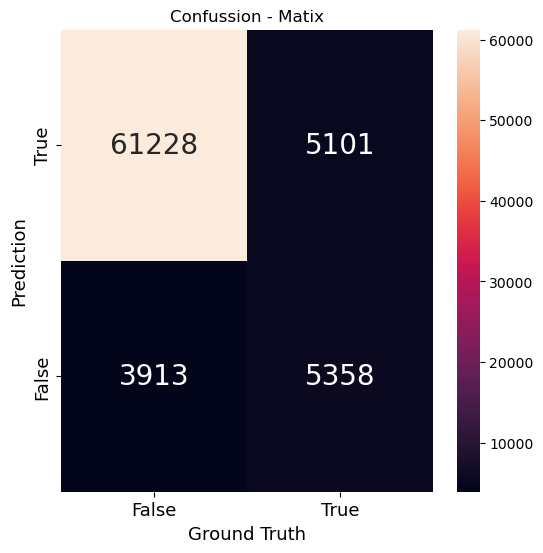

In [24]:
# Using Decision-Tree-Classifier

from sklearn.tree import DecisionTreeClassifier

useModel(DecisionTreeClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



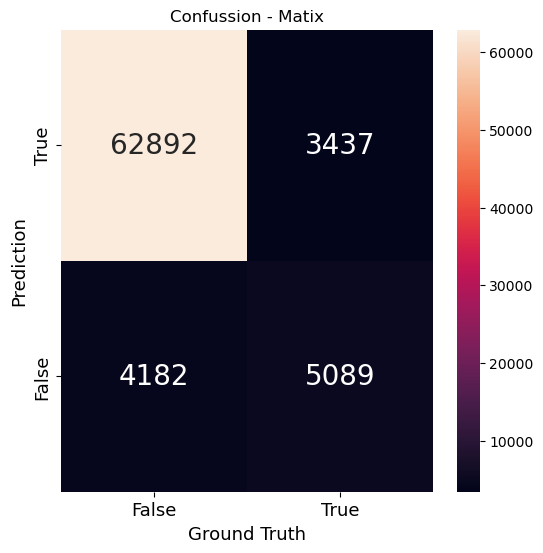

In [25]:
# Using Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

useModel(RandomForestClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     66329
         1.0       0.58      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.76      0.75      0.76     75600
weighted avg       0.89      0.90      0.90     75600



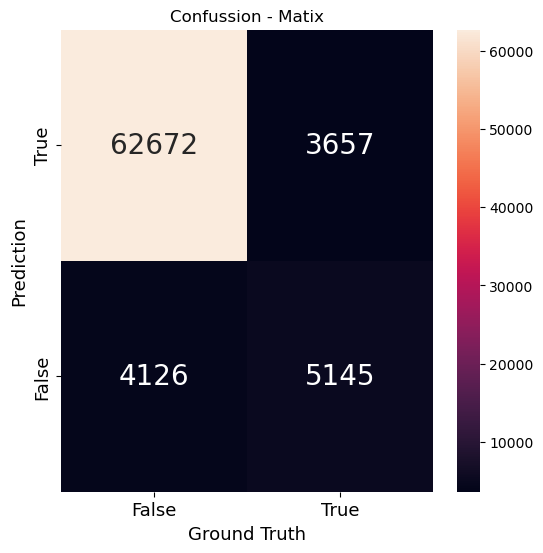

In [26]:
# Using Bagging Classifier

from sklearn.ensemble import BaggingClassifier

useModel(BaggingClassifier(), X, y)

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.53      0.56      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.74      0.75     75600
weighted avg       0.89      0.90      0.90     75600



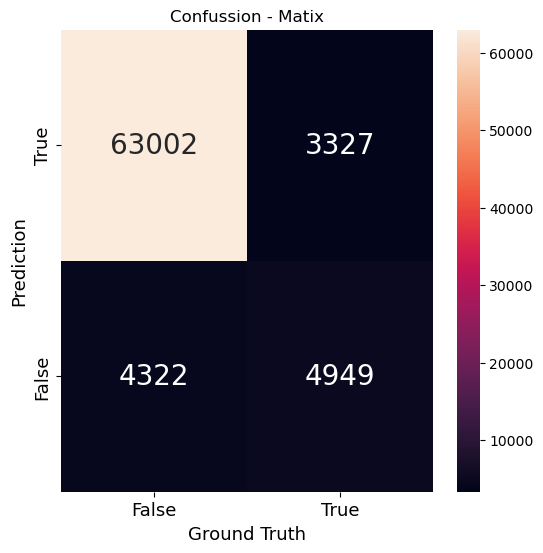

In [27]:
# Using Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

useModel(ExtraTreesClassifier(), X, y)

# *Model Selection*

In [28]:
# Let's see the Train & Test Accuracies

def get_accuracy(X_data, y_data, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)))
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))

In [29]:
get_accuracy(X, y, RandomForestClassifier())

Test Accuracy :  0.8990476190476191
Train Accuracy :  0.9373299319727891


**Hence, we conclude by showing our final outcomes i.e.,
TEST accuracy of 89.88% ~ 90% and,
TRAIN acccuracy of 93.73% ~ 94%**